/tmp/ipykernel_2391/384200946.py:111: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


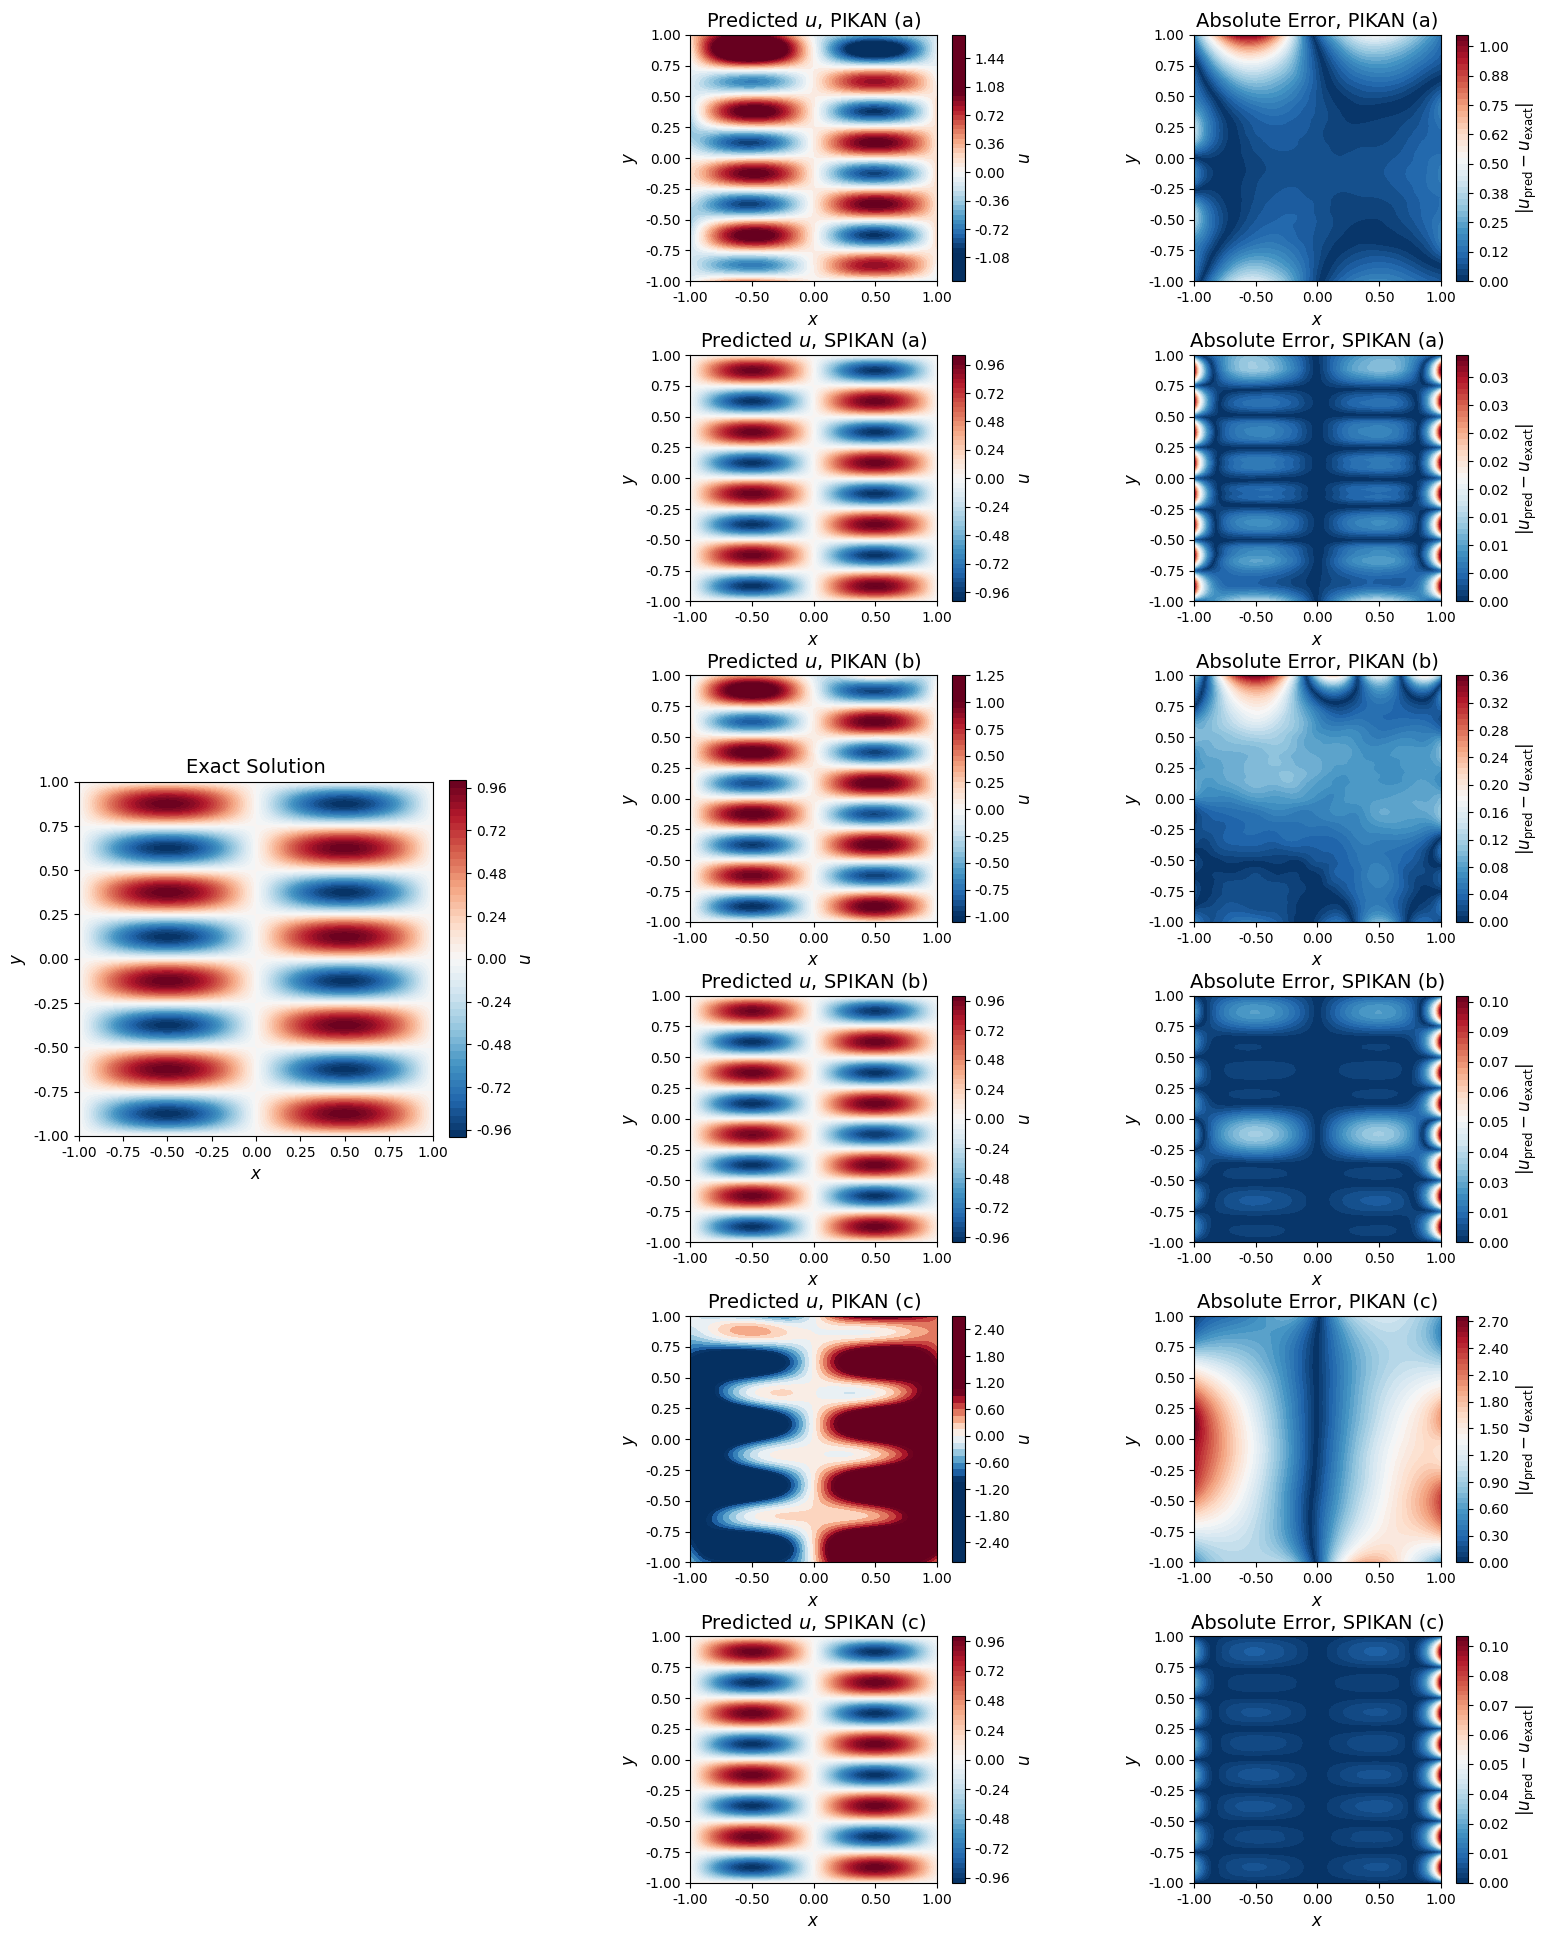

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker

# Configure global font settings for consistency
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 12,
})

def set_tick_format(ax, cbar, decimals=2):
    formatter = ticker.FormatStrFormatter(f'%.{decimals}f')
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)
    cbar.ax.yaxis.set_major_formatter(formatter)


def exact_solution(x, y, a1, a2):
    """Define exact solution for the Helmholtz equation"""
    return np.sin(a1 * np.pi * x) * np.sin(a2 * np.pi * y)

# Load datasets (you'll need to load all 6 variants)
pikan_a_data = np.load('./data/2d_helmholtz_pikan_nx100_ny100_[2, 6, 6, 1].npy', allow_pickle=True).item()
spikan_a_data = np.load('./data/2d_helmholtz_spikan_nx100_ny100_[1, 3, 3, 1].npy', allow_pickle=True).item()
pikan_b_data = np.load('./data/2d_helmholtz_pikan_nx100_ny100_[2, 9, 9, 1].npy', allow_pickle=True).item()
spikan_b_data = np.load('./data/2d_helmholtz_spikan_nx100_ny100_[1, 5, 5, 1].npy', allow_pickle=True).item()
pikan_c_data = np.load('./data/2d_helmholtz_pikan_nx200_ny200_[2, 9, 9, 1].npy', allow_pickle=True).item()
spikan_c_data = np.load('./data/2d_helmholtz_spikan_nx200_ny200_[1, 5, 5, 1].npy', allow_pickle=True).item()


# Compute exact solutions for each grid
def get_exact_and_error(data):
    X, Y = np.meshgrid(data['x'], data['y'])
    u_exact = exact_solution(X, Y, a1=1.0, a2=4.0)
    error = np.abs(data['u'] - u_exact)
    return {'grid': (X, Y), 'u_exact': u_exact, 'error': error}

# Process all datasets
pikan_a_proc = get_exact_and_error(pikan_a_data)
spikan_a_proc = get_exact_and_error(spikan_a_data)
pikan_b_proc = get_exact_and_error(pikan_b_data)
spikan_b_proc = get_exact_and_error(spikan_b_data)
pikan_c_proc = get_exact_and_error(pikan_c_data)
spikan_c_proc = get_exact_and_error(spikan_c_data)

# Create figure with 6 rows, 3 columns
fig = plt.figure(figsize=(18, 24))
gs = gridspec.GridSpec(6, 3, width_ratios=[1, 1, 1], wspace=0.3, hspace=0.3)

# Plot the exact solution once
X_ref, Y_ref = pikan_a_proc['grid']  # Using first grid for reference
u_exact_ref = pikan_a_proc['u_exact']
ax_exact = plt.subplot(gs[:, 0])  # Span all rows
im_exact = ax_exact.contourf(X_ref, Y_ref, u_exact_ref, levels=50, cmap='RdBu_r', vmin=-1, vmax=1)
cbar_exact = plt.colorbar(im_exact, ax=ax_exact, fraction=0.046, pad=0.04)
cbar_exact.set_label(r'$u$')
ax_exact.set_title('Exact Solution')
ax_exact.set_aspect('equal')
ax_exact.set_xlim(-1, 1)
ax_exact.set_ylim(-1, 1)
ax_exact.set_xlabel(r'$x$')
ax_exact.set_ylabel(r'$y$')
set_tick_format(ax_exact, cbar_exact, decimals=2)

# Define data for prediction and error plots
row_data = [
    ('PIKAN (a)', pikan_a_data, pikan_a_proc),
    ('SPIKAN (a)', spikan_a_data, spikan_a_proc),
    ('PIKAN (b)', pikan_b_data, pikan_b_proc),
    ('SPIKAN (b)', spikan_b_data, spikan_b_proc),
    ('PIKAN (c)', pikan_c_data, pikan_c_proc),
    ('SPIKAN (c)', spikan_c_data, spikan_c_proc)
]

# Create plots for each row (only prediction and error)
for idx, (model_name, data, proc_data) in enumerate(row_data):
    X, Y = proc_data['grid']
    
    # Predicted solution
    ax_pred = plt.subplot(gs[idx, 1])
    im_pred = ax_pred.contourf(X, Y, data['u'], levels=50, cmap='RdBu_r', vmin=-1, vmax=1)
    cbar_pred = plt.colorbar(im_pred, ax=ax_pred, fraction=0.046, pad=0.04)
    cbar_pred.set_label(r'$u$')
    ax_pred.set_title(f'Predicted $u$, {model_name}')
    ax_pred.set_aspect('equal')
    ax_pred.set_xlim(-1, 1)
    ax_pred.set_ylim(-1, 1)
    ax_pred.set_xlabel(r'$x$')
    ax_pred.set_ylabel(r'$y$')
    set_tick_format(ax_pred, cbar_pred, decimals=2)

    # Error plot
    ax_err = plt.subplot(gs[idx, 2])
    im_err = ax_err.contourf(X, Y, proc_data['error'], levels=50, cmap='RdBu_r')
    cbar_err = plt.colorbar(im_err, ax=ax_err, fraction=0.046, pad=0.04)
    cbar_err.set_label(r'$|u_{\text{pred}} - u_{\text{exact}}|$')
    ax_err.set_title(f'Absolute Error, {model_name}')
    ax_err.set_aspect('equal')
    ax_err.set_xlim(-1, 1)
    ax_err.set_ylim(-1, 1)
    ax_err.set_xlabel(r'$x$')
    ax_err.set_ylabel(r'$y$')
    set_tick_format(ax_err, cbar_err, decimals=2)

# Adjust layout and save
plt.tight_layout()
plt.savefig('./results/comparison_helmholtz2d_6models.png', dpi=600, bbox_inches='tight')
plt.show()


In [11]:

# Print error statistics for all models
for model_name, _, proc_data in row_data:
    error = proc_data['error']
    u_exact = proc_data['u_exact']
    print(f"\n{model_name.upper()} Error Statistics:")
    print(f"Mean Absolute Error: {np.mean(error):.2e}")
    print(f"Max Absolute Error: {np.max(error):.2e}")
    print(f"L2 Error %: {100 * np.sqrt(np.mean(error**2))/np.sqrt(np.mean(u_exact**2)):.2f}%")


PIKAN (A) Error Statistics:
Mean Absolute Error: 1.23e-01
Max Absolute Error: 1.03e+00
L2 Error %: 37.26%

SPIKAN (A) Error Statistics:
Mean Absolute Error: 4.25e-03
Max Absolute Error: 3.47e-02
L2 Error %: 1.29%

PIKAN (B) Error Statistics:
Mean Absolute Error: 6.16e-02
Max Absolute Error: 3.54e-01
L2 Error %: 15.73%

SPIKAN (B) Error Statistics:
Mean Absolute Error: 8.27e-03
Max Absolute Error: 1.02e-01
L2 Error %: 2.91%

PIKAN (C) Error Statistics:
Mean Absolute Error: 9.94e-01
Max Absolute Error: 2.72e+00
L2 Error %: 228.84%

SPIKAN (C) Error Statistics:
Mean Absolute Error: 5.08e-03
Max Absolute Error: 9.88e-02
L2 Error %: 2.20%
